In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [64]:
sns.set(rc={'figure.figsize':(6, 3)})

In [65]:
df_airbnb = pd.read_csv('/AB_NYC_2019.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [66]:
df_airbnb.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [67]:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [68]:
df_airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [69]:
df_airbnb["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [70]:
df_airbnb["room_type"].head()

0       Private room
1    Entire home/apt
2       Private room
3    Entire home/apt
4    Entire home/apt
Name: room_type, dtype: object

Text(0.5, 1.0, 'Frequencies of Room Type')

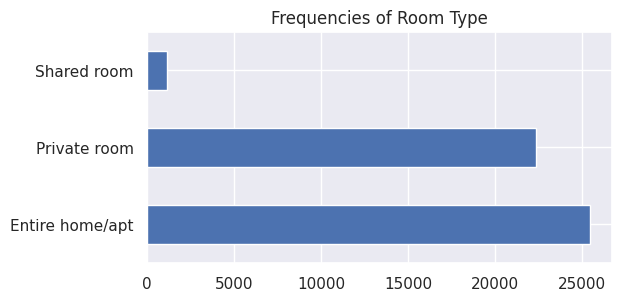

In [71]:
df_airbnb["room_type"].value_counts().plot.barh().set_title("Frequencies of Room Type")

Text(0.5, 1.0, 'Frequencies of Room Type')

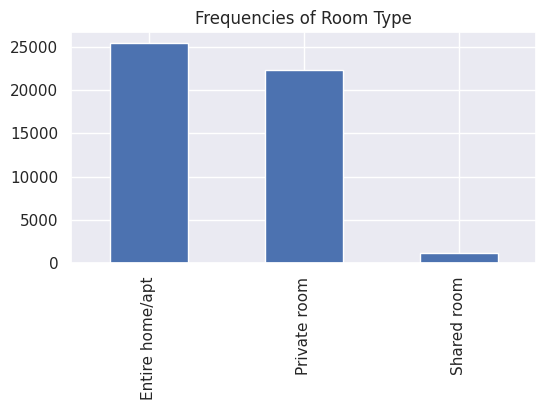

In [72]:
df_airbnb["room_type"].value_counts().plot.bar().set_title("Frequencies of Room Type")

In [73]:
df_airbnb["room_type"].index

RangeIndex(start=0, stop=48895, step=1)

Text(0.5, 1.0, 'Room Type Density')

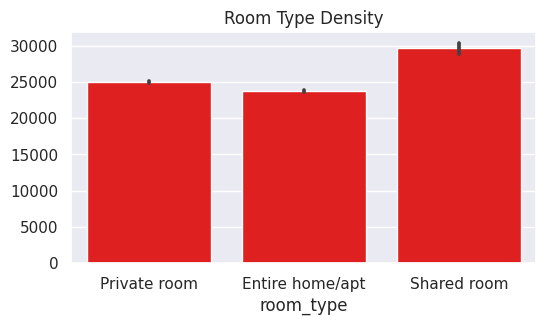

In [74]:
sns.barplot(x="room_type", y=df_airbnb["room_type"].index, data=df_airbnb, color="red").set_title("Room Type Density")

Text(0.5, 1.0, 'Room Type - Price - Neighbourhood Group')

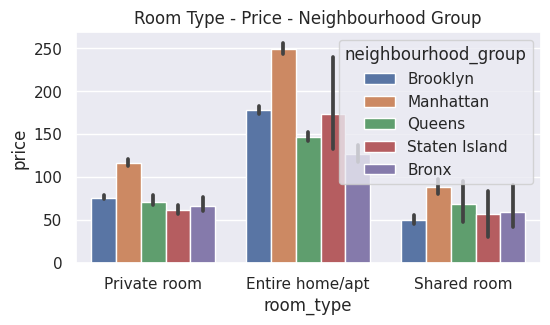

In [75]:
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=df_airbnb)
plt.title("Room Type - Price - Neighbourhood Group")

In [76]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<ipython-input-77-38c0d545dfcf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_airbnb.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

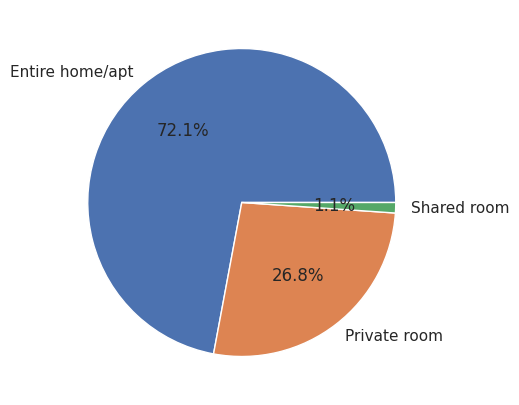

In [77]:
df_airbnb.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

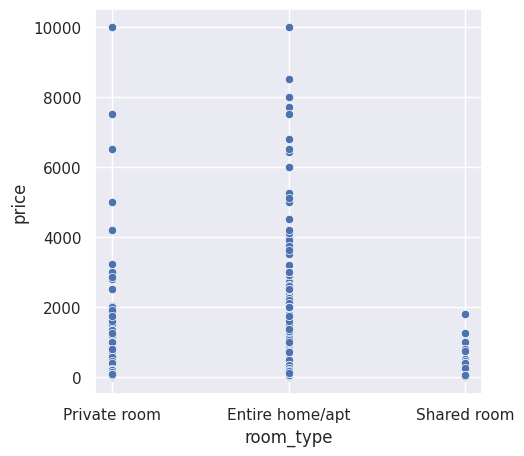

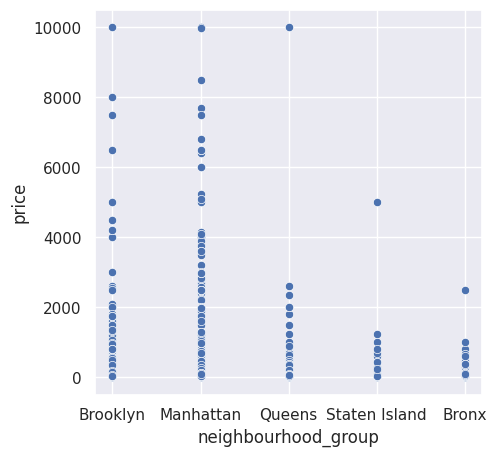

In [78]:
cols = ["room_type", "neighbourhood_group"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="price", data=df_airbnb)

<Axes: xlabel='price', ylabel='Count'>

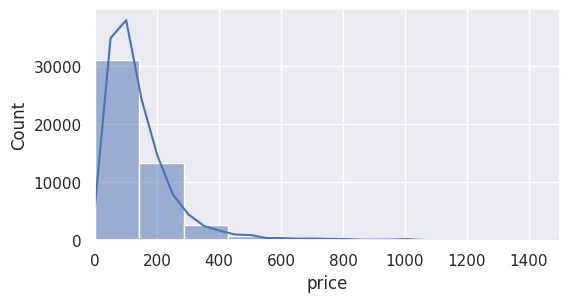

In [80]:
plt.xlim(0, 1500)
sns.histplot(df_airbnb["price"], kde=True, bins=70)

<Axes: xlabel='price', ylabel='Density'>

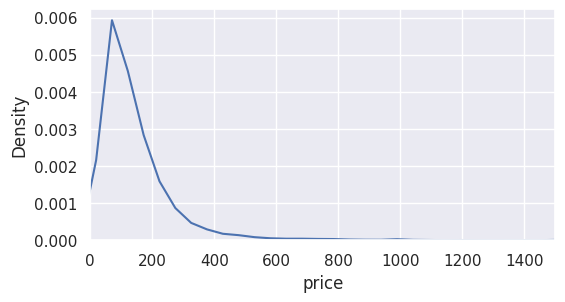

In [81]:
plt.xlim(0, 1500)
sns.kdeplot(df_airbnb["price"])

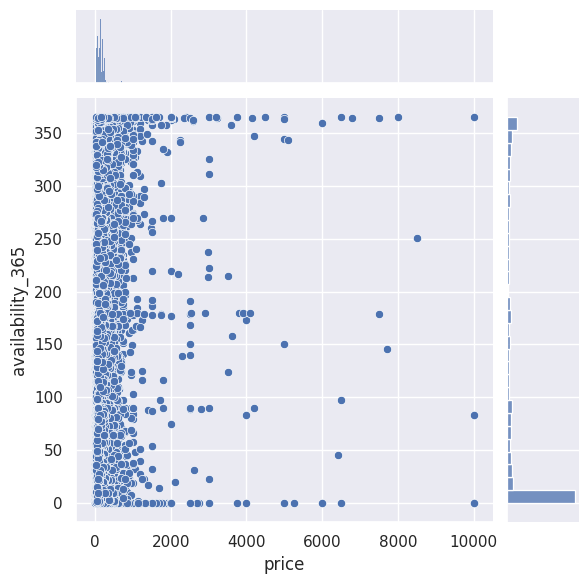

In [82]:
sns.jointplot(x="price", y=df_airbnb["availability_365"], data=df_airbnb)

Text(0.5, 1.0, 'Room Type - Price')

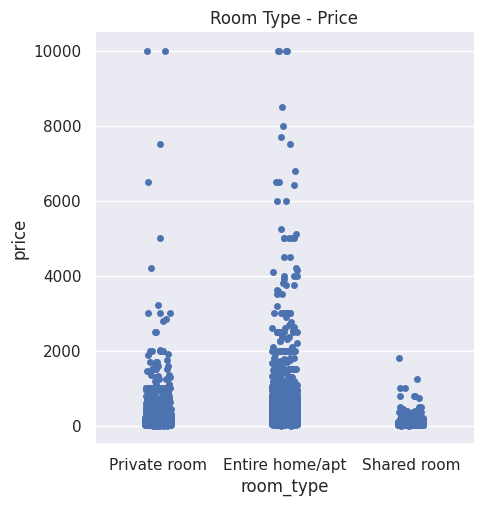

In [83]:
sns.catplot(x="room_type", y="price", data=df_airbnb)
plt.title("Room Type - Price")

Text(0.5, 1.0, 'Room Type - Price')

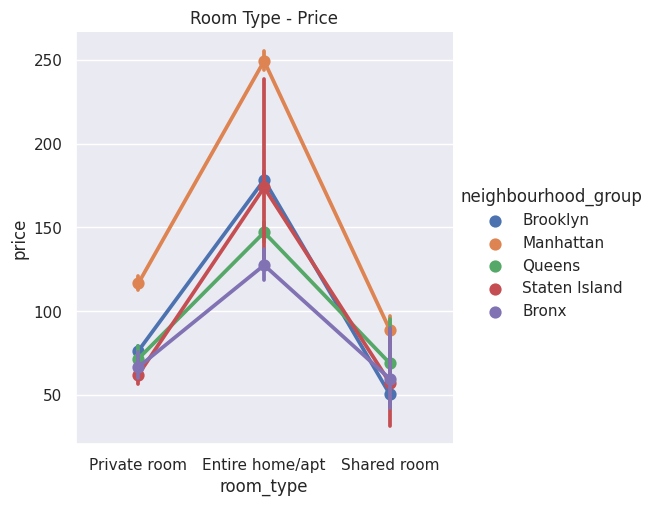

In [84]:
sns.catplot(x="room_type", y="price", hue="neighbourhood_group", kind="point", data=df_airbnb)
plt.title("Room Type - Price")

<ipython-input-85-47f7dd93ccf7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_airbnb["price"], shade=True)


<Axes: xlabel='price', ylabel='Density'>

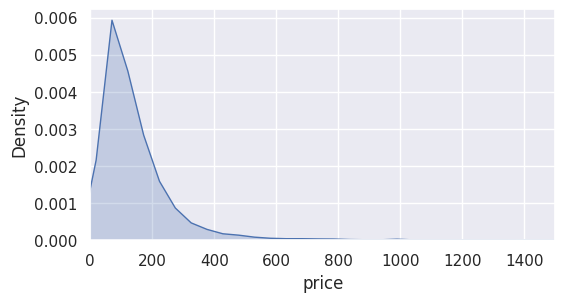

In [85]:
plt.xlim(0, 1500)
sns.kdeplot(df_airbnb["price"], shade=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


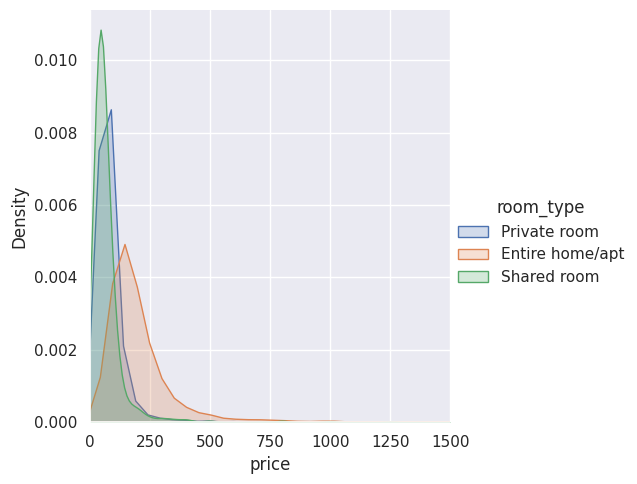

In [86]:
(sns.FacetGrid(df_airbnb, hue="room_type", height=5, xlim=(0, 1500)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-89-eda10d3f404d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_airbnb.corr(), annot=True,annot_kws={"size":8});


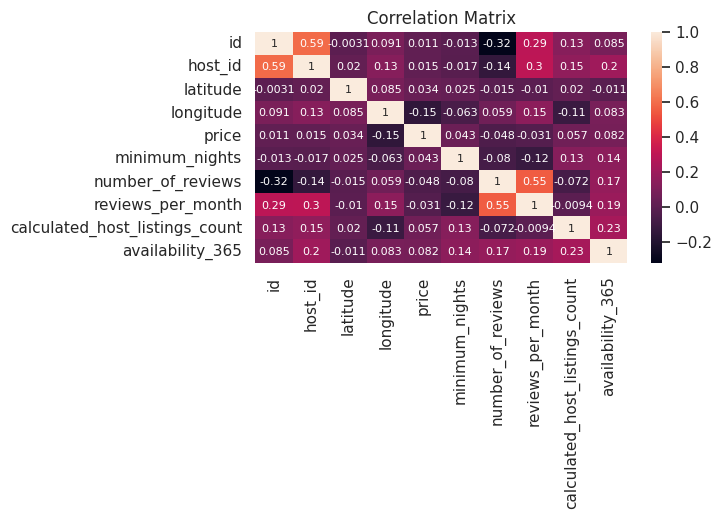

In [89]:
plt.title("Correlation Matrix")
sns.heatmap(df_airbnb.corr(), annot=True,annot_kws={"size":8});

<ipython-input-90-6072116c2868>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_airbnb.corr(),cmap='crest' ,annot=True,annot_kws={"size":8})


<Axes: title={'center': 'Correlation Matrix'}>

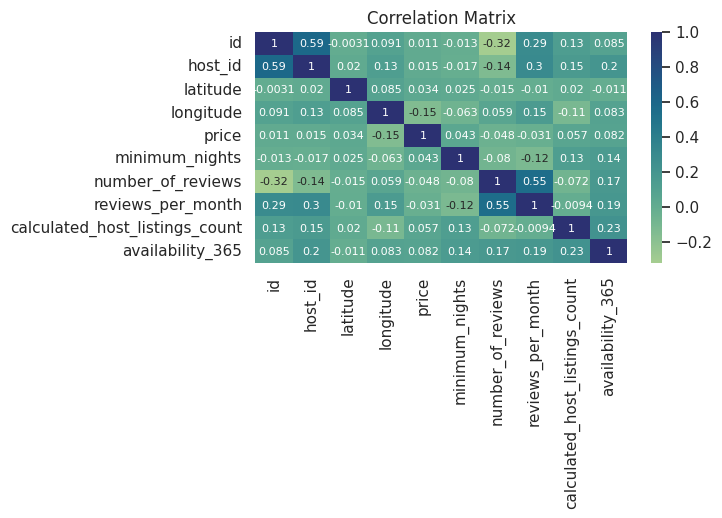

In [90]:
plt.title("Correlation Matrix")
sns.heatmap(df_airbnb.corr(),cmap='crest' ,annot=True,annot_kws={"size":8})